In [ ]:
#pip install alpha_vantage pandas
#Your API key is: MVPD59K08DSW0ANM.

In [ ]:
pip install alpha_vantage pandas ta


  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=8a8eb6f93940ca0f7c76753d3bc0ce677a4716697ca5176f5cb7dabf8b21a227
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
sns.set() # setting seaborn default for plots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from google.colab import files
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from pandas_profiling import ProfileReport
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from matplotlib import style
import datetime as dt1
from datetime import datetime as dt
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
import keras
import keras.backend as K
import ta
K.clear_session()
key = 'MVPD59K08DSW0ANM'
key = '662ULMA9IRI9706B'
key = 'IEIUKL0X9WEK0E2A'
key = 'BT0IMUWGM1BO0E9P'

In [ ]:
cut_off = 3300

**Extracting stock timeseries**

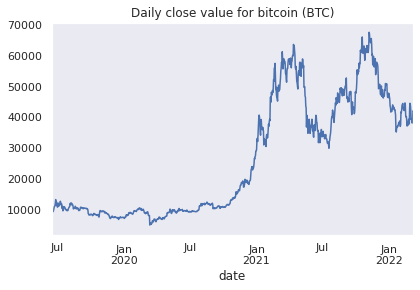

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2019-06-15,8650.88,8650.88,8864.99,8864.99,8567.63,8567.63,8808.70,8808.70,31791.636039,31791.636039
2019-06-16,8810.77,8810.77,9333.00,9333.00,8760.00,8760.00,8953.33,8953.33,63289.251219,63289.251219
2019-06-17,8953.00,8953.00,9444.00,9444.00,8950.00,8950.00,9313.96,9313.96,47895.485374,47895.485374
2019-06-18,9312.13,9312.13,9336.36,9336.36,8950.00,8950.00,9081.55,9081.55,51554.569401,51554.569401
2019-06-19,9081.97,9081.97,9304.00,9304.00,8960.00,8960.00,9255.49,9255.49,32147.706495,32147.706495
...,...,...,...,...,...,...,...,...,...,...
2022-03-06,39397.97,39397.97,39693.87,39693.87,38088.57,38088.57,38420.81,38420.81,39677.261580,39677.261580
2022-03-07,38420.80,38420.80,39547.57,39547.57,37155.00,37155.00,37988.00,37988.00,63941.203160,63941.203160
2022-03-08,37988.01,37988.01,39362.08,39362.08,37867.65,37867.65,38730.63,38730.63,55528.433670,55528.433670


In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key=key, output_format='pandas')
data1, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='USD')
data1 = data1.iloc[::-1]

data1['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()
data1

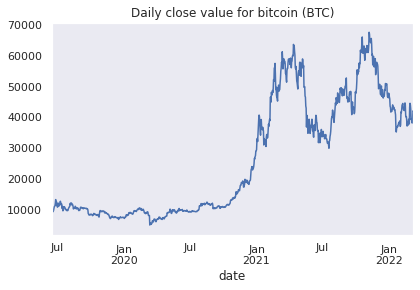

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2022-03-10,41941.70,41941.70,42039.63,42039.63,41783.23,41783.23,41805.51,41805.51,973.887120,973.887120
2022-03-09,38730.63,38730.63,42594.06,42594.06,38656.45,38656.45,41941.71,41941.71,67392.587990,67392.587990
2022-03-08,37988.01,37988.01,39362.08,39362.08,37867.65,37867.65,38730.63,38730.63,55528.433670,55528.433670
2022-03-07,38420.80,38420.80,39547.57,39547.57,37155.00,37155.00,37988.00,37988.00,63941.203160,63941.203160
2022-03-06,39397.97,39397.97,39693.87,39693.87,38088.57,38088.57,38420.81,38420.81,39677.261580,39677.261580
...,...,...,...,...,...,...,...,...,...,...
2019-06-19,9081.97,9081.97,9304.00,9304.00,8960.00,8960.00,9255.49,9255.49,32147.706495,32147.706495
2019-06-18,9312.13,9312.13,9336.36,9336.36,8950.00,8950.00,9081.55,9081.55,51554.569401,51554.569401
2019-06-17,8953.00,8953.00,9444.00,9444.00,8950.00,8950.00,9313.96,9313.96,47895.485374,47895.485374


In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key=key, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='USD')
#data = data.iloc[::-1]

data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()
data

In [ ]:
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands


# Load datas


# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=data1["4b. close (USD)"], window=20, window_dev=2,fillna= True)

# Add Bollinger Bands features
#data['bb_bbm'] = indicator_bb.bollinger_mavg()
#data['bb_bbh'] = indicator_bb.bollinger_hband()
data['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
#data['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
data['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

In [ ]:
data

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD),bb_bbl,bb_bbli
date,,,,,,,,,,,,
2022-03-10,41941.70,41941.70,42039.63,42039.63,41783.23,41783.23,41805.51,41805.51,973.887120,973.887120,35402.995859,0.0
2022-03-09,38730.63,38730.63,42594.06,42594.06,38656.45,38656.45,41941.71,41941.71,67392.587990,67392.587990,35403.464946,0.0
2022-03-08,37988.01,37988.01,39362.08,39362.08,37867.65,37867.65,38730.63,38730.63,55528.433670,55528.433670,35433.388557,0.0
2022-03-07,38420.80,38420.80,39547.57,39547.57,37155.00,37155.00,37988.00,37988.00,63941.203160,63941.203160,35340.320940,0.0
2022-03-06,39397.97,39397.97,39693.87,39693.87,38088.57,38088.57,38420.81,38420.81,39677.261580,39677.261580,35343.962148,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-19,9081.97,9081.97,9304.00,9304.00,8960.00,8960.00,9255.49,9255.49,32147.706495,32147.706495,8708.278393,0.0
2019-06-18,9312.13,9312.13,9336.36,9336.36,8950.00,8950.00,9081.55,9081.55,51554.569401,51554.569401,8668.183774,0.0
2019-06-17,8953.00,8953.00,9444.00,9444.00,8950.00,8950.00,9313.96,9313.96,47895.485374,47895.485374,8600.406738,0.0


In [ ]:
data["4b. close (USD)"]

date
2022-03-10    41805.51
2022-03-09    41941.71
2022-03-08    38730.63
2022-03-07    37988.00
2022-03-06    38420.81
                ...   
2019-06-19     9255.49
2019-06-18     9081.55
2019-06-17     9313.96
2019-06-16     8953.33
2019-06-15     8808.70
Name: 4b. close (USD), Length: 1000, dtype: float64

In [ ]:
import ta
data['sma'] = ta.trend.sma_indicator(data1["4b. close (USD)"], window=14, fillna=True)
data['ema'] = ta.trend.ema_indicator(data1["4b. close (USD)"], window=14, fillna=True)
data['RSI'] = ta.momentum.rsi(data1["4b. close (USD)"], window=14, fillna=True)
data['macd'] = ta.trend.macd_diff(data1["4b. close (USD)"], window_slow=14, window_fast=12, window_sign=9, fillna=True)

data['obv'] = ta.volume.on_balance_volume(data1["4b. close (USD)"], data1["5. volume"], fillna=True)

data['vwap'] = ta.volume.volume_weighted_average_price( data1['2a. high (USD)'], data1['3a. low (USD)'], data1['4b. close (USD)'], data1['5. volume'], window = 14, fillna= True)
data['stoch'] = ta.momentum.stoch(data1['2a. high (USD)'], data1['3a. low (USD)'], data1['4b. close (USD)'], window=14, smooth_window=3, fillna=True) 
data['cci'] = ta.trend.cci(data1['2a. high (USD)'], data1['3a. low (USD)'], data1['4b. close (USD)'], window=20, constant=0.015, fillna=True)
data['adx'] = ta.trend.adx(data1['2a. high (USD)'], data1['3a. low (USD)'], data1['4b. close (USD)'], window=14, fillna=True)



/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [ ]:
data['macd']= data['macd'] / (data1["4b. close (USD)"] )
data['sma']= data['sma']/ (data1["4b. close (USD)"] )
data['ema']= data['ema']/ (data1["4b. close (USD)"] )
data['adx']= data['adx']/ (data1["4b. close (USD)"] )
data['vwap']= data['vwap']/ (data1["4b. close (USD)"] )

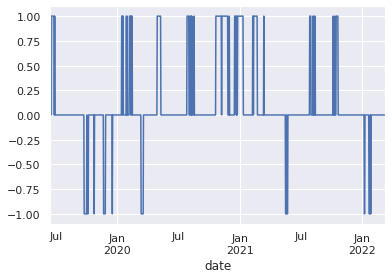

In [ ]:
data.loc[data['RSI'] < 30, 'RSI'] = -1
data.loc[data['RSI'] > 70, 'RSI'] = 1
data.loc[(data['RSI'] > 30) & (data['RSI'] < 70), 'RSI'] = 0
data['RSI'].plot()

In [ ]:
data['4a. close (USD)'].size

1000

In [ ]:
data['target'] = np.zeros(data1['4b. close (USD)'].size)  
for i in range(data['4a. close (USD)'].size - 7):
    #data['target'][i] = (-data['5. adjusted close'][i] + ((data['5. adjusted close'][i + 7] +  data['5. adjusted close'][i + 6] +  data['5. adjusted close'][i + 5]+  data['5. adjusted close'][i + 4]+  data['5. adjusted close'][i + 3]+  data['5. adjusted close'][i + 2]+  data['5. adjusted close'][i + 1]) / 7)  ) / data['5. adjusted close'][i]
    data['target'][i] = (-data['4b. close (USD)'][i] + data['4b. close (USD)'][i + 7]   ) / data['4b. close (USD)'][i]
    data['target'][i] = data['target'][i] *100
def trend(x):
    if x > 4:        
        return 1
    elif x < -4:        
        return -1
    else:
        return 0
data['target']= data['target'].apply(lambda x:trend(x))    

In [ ]:
data = data.drop(columns=['1a. open (USD)','1b. open (USD)','2a. high (USD)','2b. high (USD)','3a. low (USD)','3b. low (USD)', '4a. close (USD)','6. market cap (USD)'])

In [ ]:
data = data.drop(columns=['4b. close (USD)', '5. volume'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


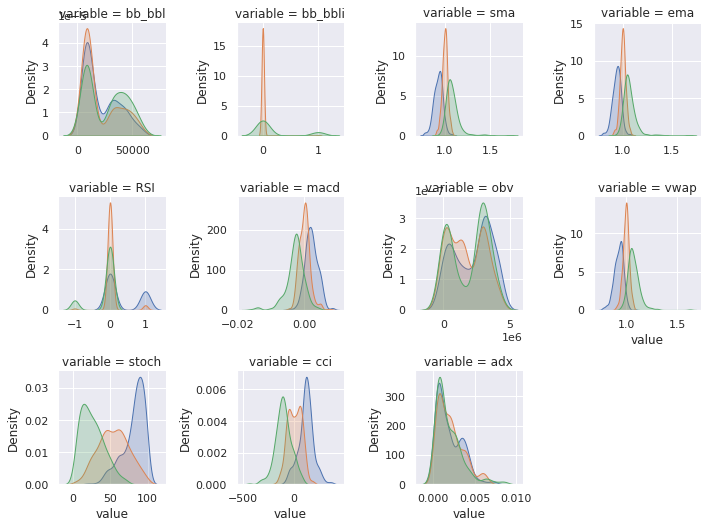

In [ ]:
sns.set(font_scale = 1)
df1 = pd.melt(data, data.columns[-1], data.columns[:-1])


g = sns.FacetGrid( df1, col="variable", hue="target", col_wrap=4,height=2.5,sharex=False,sharey=False)
g.map(sns.kdeplot, "value", shade=True)

plt.show()


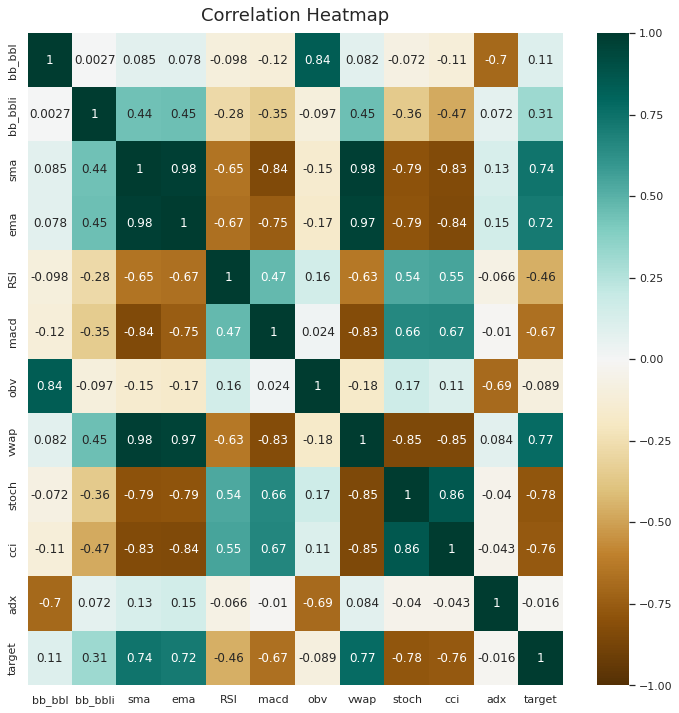

In [ ]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
target = data['target']
data = data.drop(columns=['adx','obv','target'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', C=1)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.80666667 0.77333333 0.79333333 0.73333333 0.78      ]
77.73


In [ ]:
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
print('The accuracy is',accuracy_score(y_test,Y_pred))

The accuracy is 0.76
